<a href="https://colab.research.google.com/github/PabloNatB/Modulo-5-BEDU/blob/main/Student_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’




In [11]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [12]:
# Load necessary libraries
library(tidyverse)
library(caret)
library(glmnet)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [13]:
# Ignore warnings
options(warn=-1)



In [14]:
# Set plot size
options(repr.plot.width=15, repr.plot.height=10)



In [15]:
# Read the CSV file
url <- "https://github.com/PabloNatB/Modulo-5-BEDU/raw/main/Student_Performance.csv"
df <- read.csv(url)

In [16]:
# Display the first few rows of the dataframe
head(df)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [17]:
# Display information about the dataframe
str(df)


'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


In [19]:

# Drop duplicates
cat("before duplicates dropped: ", nrow(df), "\n")
df <- df[!duplicated(df), ]
cat("after duplicates dropped: ", nrow(df), "\n")



before duplicates dropped:  9873 
after duplicates dropped:  9873 


In [20]:
# Extract the 'Performance Index' column
response <- df$`Performance Index`
cat("Response variable type: ", typeof(response), "\n")



Response variable type:  NULL 


ERROR: Error in plot.window(...): need finite 'xlim' values


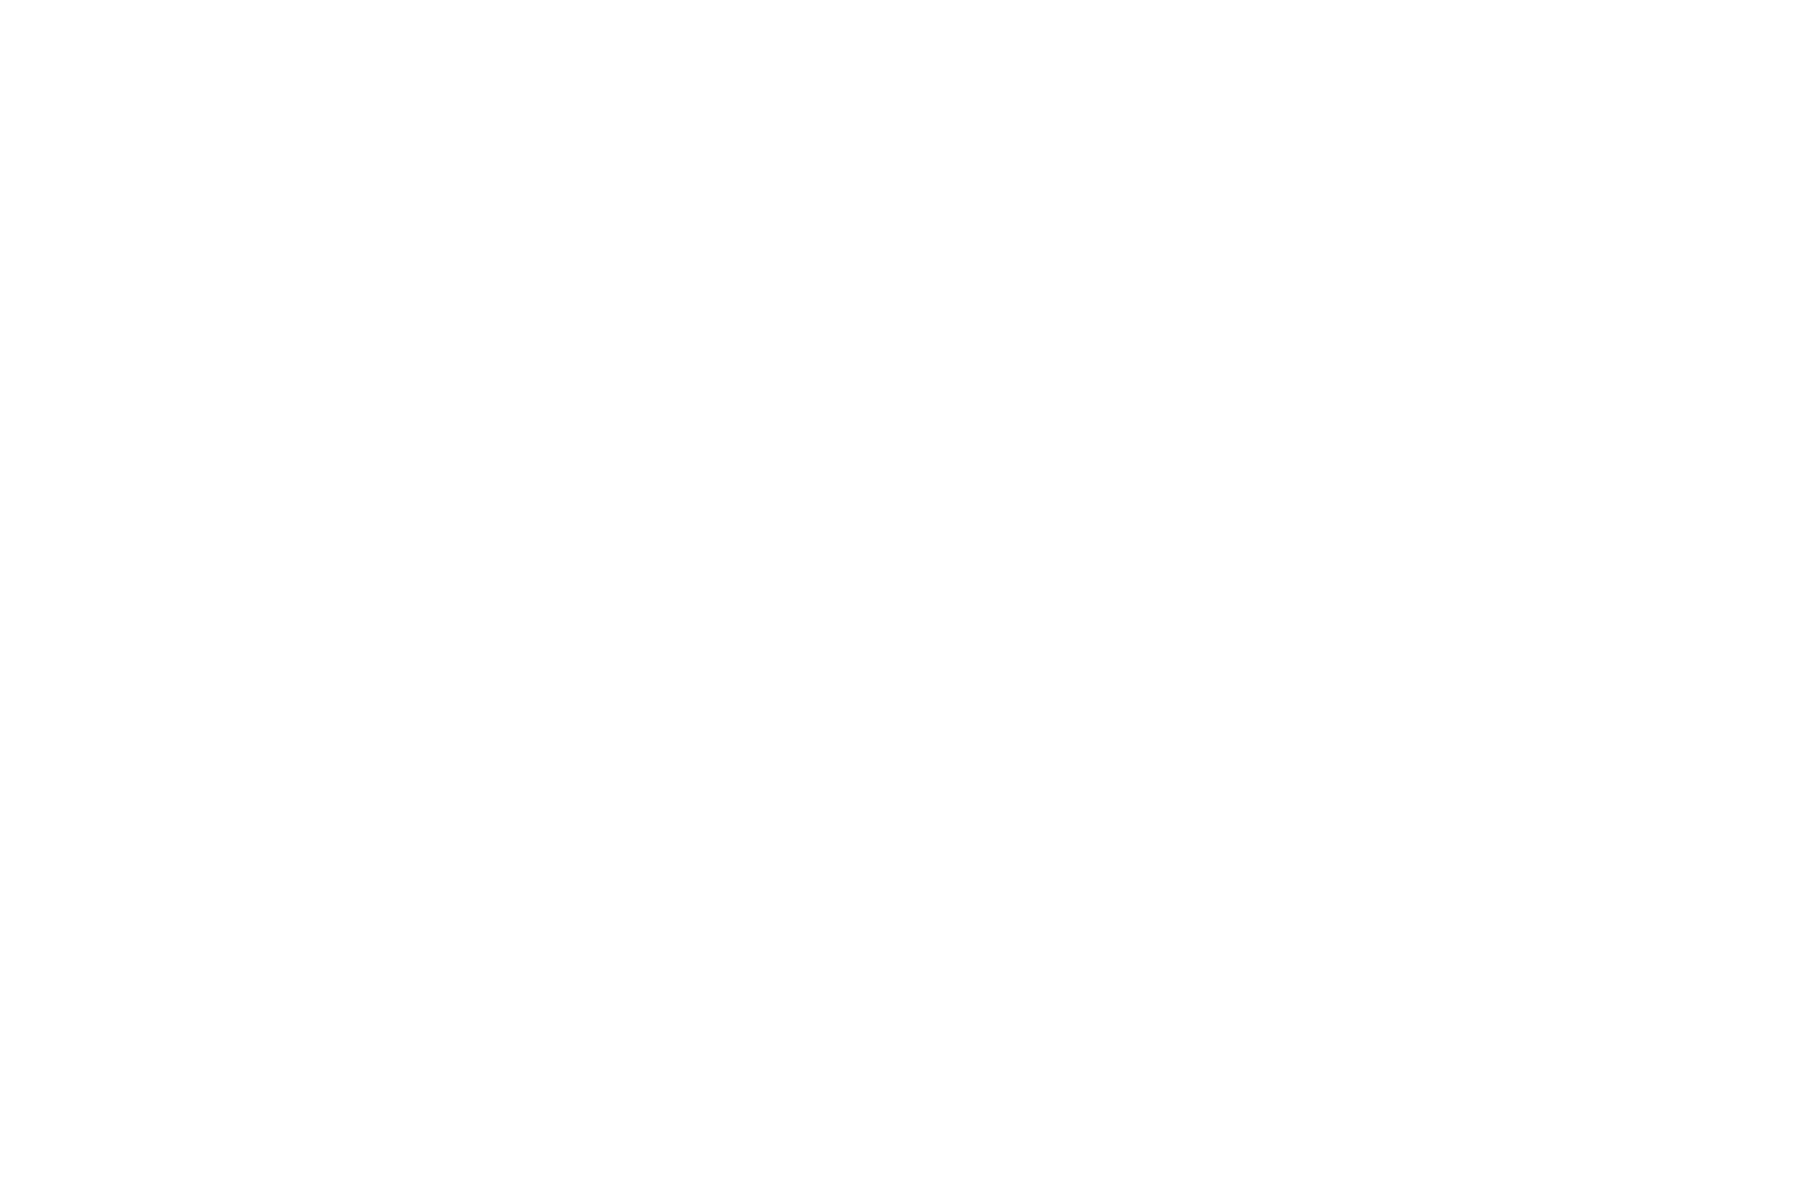

In [21]:
# Plot the response variable
plot(response, type="l", xlab="index", ylab="Performance Index")


In [22]:

# Check the overall distribution of the response variable
violinplot <- ggplot(df, aes(x=factor(1), y=response, fill=factor(1))) +
  geom_violin(color='#f5d376') +
  theme_minimal()
print(violinplot)

cat("Minimum response:", min(response), "\n")
cat("Maximum response:", max(response), "\n")



ERROR: [1m[33mError[39m in `geom_violin()`:[22m
[1m[22m[33m![39m Problem while computing stat.
[36mℹ[39m Error occurred in the 1st layer.
[1mCaused by error in `compute_layer()`:[22m
[1m[22m[33m![39m `stat_ydensity()` requires the following missing aesthetics: [32my[39m


In [23]:
# Explore the 'Hours Studied' variable
X_hours_studied <- df$`Hours Studied`
cat("Variable type: ", typeof(X_hours_studied), "\n")
cat("Unique values: ", unique(X_hours_studied), "\n")


Variable type:  NULL 
Unique values:  


In [24]:

# Plot histogram and boxplot
hist(X_hours_studied)
boxplot(response ~ X_hours_studied, data=df)



ERROR: Error in hist.default(X_hours_studied): 'x' must be numeric


In [25]:
# Plot violin plot
ggplot(df, aes(x=factor(1), y=X_hours_studied, fill=factor(1))) +
  geom_violin(color='#f7ba81') +
  theme_minimal()


ERROR while rich displaying an object: Error in `geom_violin()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `compute_layer()`:
! `stat_ydensity()` requires the following missing aesthetics: y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_

In [26]:

# Explore the 'Previous Scores' variable
X_previous_scores <- df$`Previous Scores`
cat("Variable type: ", typeof(X_previous_scores), "\n")

# Plot histogram and violin plot
hist(X_previous_scores)
ggplot(df, aes(x=factor(1), y=X_previous_scores, fill=factor(1))) +
  geom_violin(color='#f7ba81') +
  theme_minimal()

# Scatter plot
ggplot(df, aes(x=X_previous_scores, y=response)) +
  geom_point()

# Explore the 'Extracurricular Activities' variable
X_extracurricular <- df$`Extracurricular Activities`
cat("Variable type: ", typeof(X_extracurricular), "\n")
head(X_extracurricular)

# Plot histogram
hist(X_extracurricular)
# Plot counts of 'Yes' and 'No'
ggplot(df, aes(x=`Extracurricular Activities`)) +
  geom_bar()

# Confidence interval calculations
Yes_Count <- df[df$`Extracurricular Activities` == 'Yes', ]$`Performance Index`
No_Count <- df[df$`Extracurricular Activities` == 'No', ]$`Performance Index`
cat("Yes proportion:", length(Yes_Count) / nrow(df), "\n")
cat("No proportion:", length(No_Count) / nrow(df), "\n")

# Line plot with confidence intervals
ggplot() +
  geom_line(aes(x=1, y=length(Yes_Count) / nrow(df)), color='red', marker='o') +
  geom_line(aes(x=2, y=length(No_Count) / nrow(df)), color='red', marker='o') +
  geom_segment(aes(x=1, xend=1, y=length(Yes_Count) / nrow(df) + 1.96*sd(Yes_Count)/sqrt(length(Yes_Count)), yend=length(Yes_Count) / nrow(df) - 1.96*sd(Yes_Count)/sqrt(length(Yes_Count))), linetype="dashed") +
  geom_segment(aes(x=2, xend=2, y=length(No_Count) / nrow(df) + 1.96*sd(No_Count)/sqrt(length(No_Count)), yend=length(No_Count) / nrow(df) - 1.96*sd(No_Count)/sqrt(length(No_Count))), linetype="dashed")

# Create a new variable 'Extracurricular_Activities_New'
df$Extracurricular_Activities_New <- ifelse(df$`Extracurricular Activities` == 'Yes', 1, 0)

# Explore the 'Sleep Hours' variable
X_sleep_hours <- df$`Sleep Hours`
cat("Variable type: ", typeof(X_sleep_hours), "\n")

# Plot histogram
hist(X_sleep_hours)

# Boxplot and violin plot
boxplot(response ~ X_sleep_hours, data=df)
ggplot(df, aes(x=factor(1), y=X_sleep_hours, fill=factor(1))) +
  geom_violin() +
  theme_minimal()

# Explore the 'Sample Question Papers Practiced' variable
X_question_papers <- df$`Sample Question Papers Practiced`
cat("Variable type: ", typeof(X_question_papers), "\n")

# Boxplot
boxplot(response ~ X_question_papers, data=df)

# Create feature matrix X and response variable Y
X <- df[c('Hours Studied', 'Previous Scores', 'Extracurricular_Activities_New', 'Sleep Hours', 'Sample Question Papers Practiced')]
Y <- df$`Performance Index`

# Split the data into training and testing sets
set.seed(42)
index <- createDataPartition(Y, p=0.7, list=FALSE)
X_train <- X[index, ]
Y_train <- Y[index]
X_test <- X[-index, ]
Y_test <- Y[-index]

# Train Ridge regression model
library(glmnet)
ridge_model <- cv.glmnet(as.matrix(X_train), Y_train, alpha=0)

# Print the R-squared score on the test set
ridge_model$glmnet.fit$dev.ratio[which.min(ridge_model$glmnet.fit$dev.ratio)] # This line shows the R-squared score

Variable type:  NULL 


ERROR: Error in hist.default(X_previous_scores): 'x' must be numeric
